# Implementing an adaptive linear neuron in Python


### Reading-in the Iris data

In [16]:
import pandas as pd
import numpy as np


df = pd.read_csv('iris.data', header=None)
df.tail()
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values


### Implementing Adaline class

In [17]:
from AdalineGD import AdalineGD

weight initialization
[ 0.01624345 -0.00611756 -0.00528172]
weight update :  0  turns
[0.04858547 0.64226808 1.50082662]
weight update :  1  turns
[ -7.80921446 -43.26659667 -23.18810629]
weight update :  2  turns
[ 303.07591056 1693.02432175  948.47909439]
weight update :  3  turns
[-11977.08323242 -66890.51902548 -37431.96870731]
weight update :  4  turns
[ 473088.32402871 2642155.37613717 1478593.36790237]
weight update :  5  turns
[-1.86869663e+07 -1.04364995e+08 -5.84043164e+07]
weight update :  6  turns
[7.38134040e+08 4.12241101e+09 2.30696702e+09]
weight update :  7  turns
[-2.91562503e+10 -1.62834987e+11 -9.11250588e+10]
weight update :  8  turns
[1.15167013e+12 6.43197222e+12 3.59943435e+12]
weight update :  9  turns
[-4.54909011e+13 -2.54062517e+14 -1.42177441e+14]
weight initialization
[ 0.01624345 -0.00611756 -0.00528172]
weight update :  0  turns
[0.01656687 0.00036629 0.00977937]
weight update :  1  turns
[0.01610128 0.00239442 0.02222095]
weight update :  2  turns
[0.01

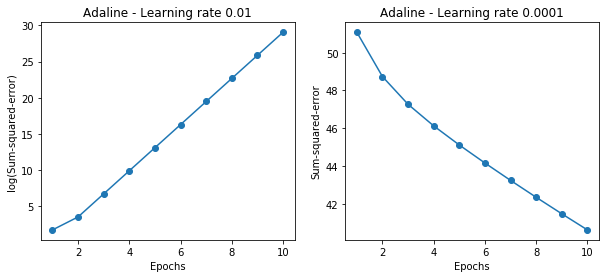

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()


In [19]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

weight initialization
[ 0.01624345 -0.00611756 -0.00528172]
weight update :  0  turns
[0.         0.73258096 0.97492511]
weight update :  1  turns
[ 1.49436019e-15 -6.37284985e-02  3.74814400e-01]
weight update :  2  turns
[3.55271368e-17 4.23794973e-01 1.02172761e+00]
weight update :  3  turns
[ 1.04138920e-15 -1.01750346e-01  6.25668805e-01]
weight update :  4  turns
[7.54951657e-17 2.20003559e-01 1.05261615e+00]
weight update :  5  turns
[ 7.73825448e-16 -1.26843862e-01  7.91226751e-01]
weight update :  6  turns
[9.54791801e-17 8.55060696e-02 1.07300186e+00]
weight update :  7  turns
[ 5.85087534e-16 -1.43404986e-01  9.00491061e-01]
weight update :  8  turns
[ 1.17683641e-16 -3.25907753e-03  1.08645593e+00]
weight update :  9  turns
[ 3.39728246e-16 -1.54334935e-01  9.72602910e-01]
weight update :  10  turns
[ 1.09912079e-16 -6.18419653e-02  1.09533531e+00]
weight update :  11  turns
[ 3.54161145e-16 -1.61548441e-01  1.02019502e+00]
weight update :  12  turns
[ 1.40998324e-16 -1.005

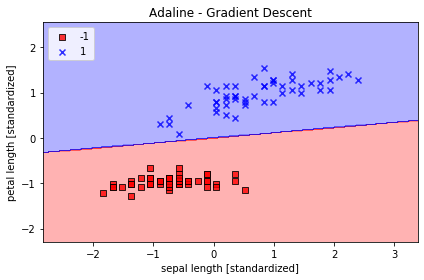

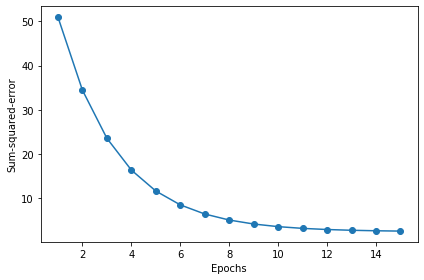

In [20]:
import plot_decision_regions

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions.create(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()
